# Elastic Powered Car: science experiment

Science Olympiad results - simulated

diameter [m] = 0.254
wobble [m] = -0.01499999987249963 0.014999999914056573


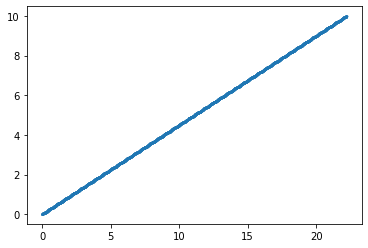

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

v  = .45
d0 = 0
df = 10

np.random.seed(42)
d = np.random.uniform(low = d0, high = df, size = 10000)
t = d/v
diam = 10 * 2.54 / 100 #10 in , 25.4 cm, .254 m
print("diameter [m] =", diam)
d_wobble = .015 *np.cos(2 * np.pi * d /diam) # inches
print("wobble [m] =", d_wobble.min(), d_wobble.max())
d = d + d_wobble

plt.scatter( t, d, s = 1)

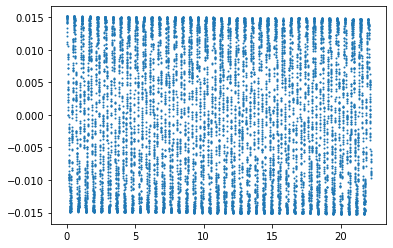

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = np.stack([t,d])
XS = np.sort(X)
t = XS[0]
d = XS[1]
model.fit(t.reshape(-1,1), d)
predictions = model.predict(t.reshape(-1,1))
plt.scatter(t, d-predictions, s = 1)

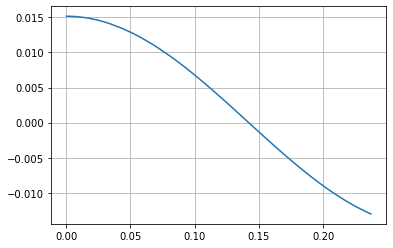

In [40]:
plt.plot(t[:100],d[:100]-predictions[:100])
plt.grid()

[9.99998102e-01 1.89838088e-06]
[700.88298186   0.96568971]


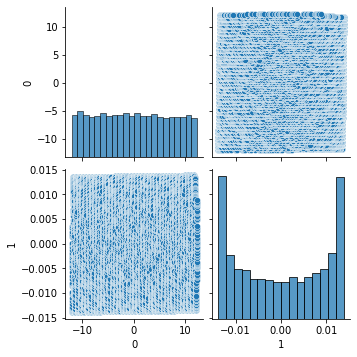

In [41]:
from sklearn.decomposition import PCA
X = np.stack([t,d], axis=0).T
pca = PCA(n_components=2)
PCA_X = pd.DataFrame( pca.fit_transform(X))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
import seaborn as sns
sns.pairplot(PCA_X)

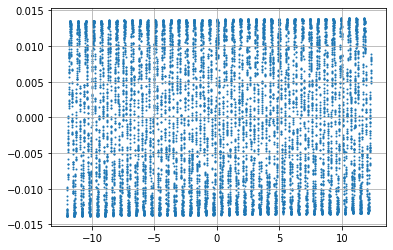

In [42]:
PCA_Res = PCA_X.sort_values(by=[0])
plt.scatter(PCA_Res[0], PCA_Res[1], s = 1)
plt.grid()

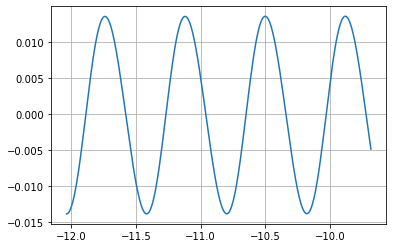

In [43]:
P = 1000
plt.plot(PCA_Res[0][:P], PCA_Res[1][:P]) 
plt.grid()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13, 246, 247, 248, 249]),)


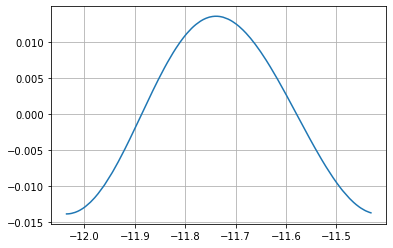

In [44]:
P0 = 0
P1 = 250

plt.plot(PCA_Res[0][P0:P1], PCA_Res[1][P0:P1]) 
plt.grid()
print(np.where(PCA_Res[1][P0:P1] < -.0135))
#np.sort(np.convolve(PCA_Res[1][P0:P1], [-1,1]))

In [45]:
proportion_samples = 246/10000 # from graph find first jump index from near to zero to over 200
estimated_diam = proportion_samples*10*100/2.54
print("Estimated Diameter [in] =",estimated_diam)

Estimated Diameter [in] = 9.68503937007874


In [46]:
tdel = -PCA_Res[0][P0:P1].tolist()[0]+ PCA_Res[0][P0:P1].tolist()[-1]
ddel = tdel*v
print("tdel",tdel)
print("ddel",ddel)
print("Estimated Range of Diameters [in] =\n",(t[246] - t[0])*v/.0254, tdel*v/.0254)

tdel 0.6044125784454462
ddel 0.2719856603004508
Estimated Range of Diameters [in] =
 9.67530775725802 10.708096862222472


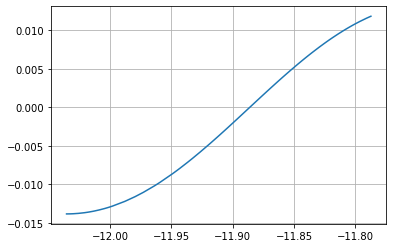

In [47]:
P = 100
plt.plot(PCA_Res[0][:P], PCA_Res[1][:P]) 
plt.grid()


array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,  246,  247,  248,  249,  250,  251,  252,  253,
        254,  255,  256,  257,  258,  259,  260,  261,  262,  263,  264,
        492,  493,  494,  495,  496,  497,  498,  499,  500,  501,  502,
        503,  504,  505,  506,  507,  508,  509,  510,  511,  512,  778,
        779,  780,  781,  782,  783,  784,  785,  786,  787,  788,  789,
        790,  791,  792,  793,  794,  795,  796,  797, 1039, 1040, 1041,
       1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052,
       1053, 1054, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302,
       1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313,
       1314, 1315, 1316, 1317, 1548, 1549, 1550, 1551, 1552, 1553, 1554,
       1555, 1556, 1557, 1558, 1559, 1560, 1561, 1813, 1814, 1815, 1816,
       1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 2069, 2070, 2071,
       2072, 2073, 2074, 2075, 2076, 2077, 2078, 20

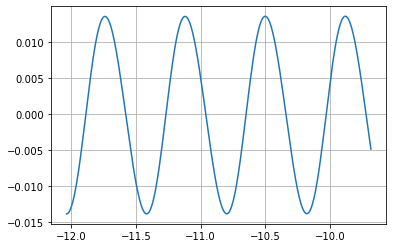

In [48]:
P0 = 0
P1 = 1000
plt.plot(PCA_Res[0][P0:P1], PCA_Res[1][P0:P1]) 
plt.grid()
# print(np.where(PCA_Res[1][P0:P1] < -.012))
# print("Period in seconds", (PCA_Res[0][P1] - PCA_Res[0][P0])) #sec
# print("Distance in m for one Period at ,45 m/s = ", (PCA_Res[0][P1] - PCA_Res[0][P0])*.45)
# diam_est = (PCA_Res[0][P1] - PCA_Res[0][P0])*.45/.254/(2*3.14)
# print("est diam", diam_est)

np.where(PCA_Res[1] < -.01352)[0] 


-0.02846191490914387

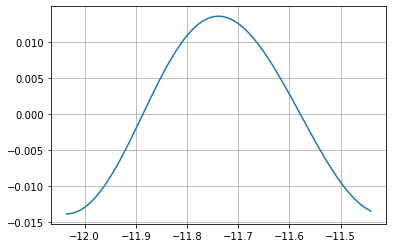

In [60]:
P0 = 0
P1 = 246
np.where(np.where(np.abs(PCA_Res[1][P0:P1]) <.001))
plt.plot(PCA_Res[0][P0:P1], PCA_Res[1][P0:P1]) 
plt.grid()
PCA_Res[1][:P].argmin()
100 * (PCA_Res[1][P0] - PCA_Res[1][P1])  # wavelength in cm

In [59]:
np.where(np.abs(PCA_Res[1][P0:P1]) <.001)

(array([ 51,  52,  53,  54, 182, 183, 184, 185, 186, 187, 188, 189]),)

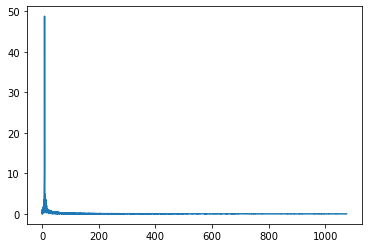

max freq idx:  39


In [87]:
x = PCA_Res[1]
t = PCA_Res[0]
ft = np.fft.rfft(x)
freqs = np.fft.rfftfreq(len(x), t[1]-t[0]) # Get frequency axis from the time axis
mags = abs(ft) # We don't care about the phase information here
plt.plot(freqs, mags)
plt.show()
print("max freq idx: ",mags.argmax())